# Pima Indians Diabetes Classification
`sklearn` 결정 트리를 이용한 분류
## 데이터 셋 출처
- [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
### 사용 라이브러리


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

### Data Load

In [103]:
df_pima = pd.read_csv("http://bit.ly/data-diabetes-csv")
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EDA
##### 데이터 형태 출력

In [104]:
df_pima.shape

(768, 9)

##### 데이터 SAMPLE을 5개만 출력해 봅니다
샘플의 경우, 랜덤하게 출력되다보니 기존 출력값과 값이 다를 수 있습니다

In [105]:
df_pima.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
393,4,116,72,12,87,22.1,0.463,37,0
188,8,109,76,39,114,27.9,0.640,31,1
761,9,170,74,31,0,44.0,0.403,43,1
681,0,162,76,36,0,49.6,0.364,26,1
19,1,115,70,30,96,34.6,0.529,32,1


데이터 정보를 확인해봅니다

In [106]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


수지형 변수 전체를 히스토그램으로 확인해보세요!  
bin 값은 50으로 설정했었지만, 변경하셔도 상관 없습니다!

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

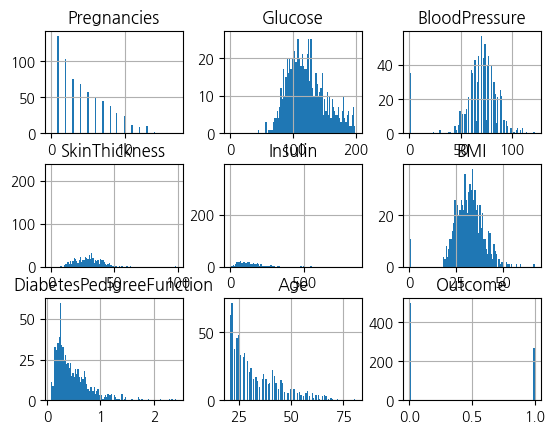

In [107]:
df_pima.hist(bins=100)

9개의 열을 가진 768개의 데이터


데이터 프레임의 컬럼 정보를 **리스트** 형태로 변환해 출력해주세요

In [108]:
columns = df_pima.columns

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm) -> 체지방 추정용
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0

### 기본적인 학습
히스토그램을 보면, `SkinThickness`와 `Insulin`, `BMI`에 이상치가 있다는 사실을 확인 할 수 있지만,  
일단 전처리를 하지 않은 상태에서 모델 성능 평가를해보고, 이후 하이퍼파라미터 튜닝을 진행하며 차이를 살펴 볼 예정  

지도 학습의 경우 기본적으로 문제의 답을 알려줘야하는데, 해당 데이터 셋에서는 `Outcome`이 답에 해당함

#### Note!
하이퍼파라미터와 파라미터는 다름  


| |  Hyperparameter | Parameter |
| :---: | :---: | :---: |
| 설명 | 모델 학습 과정에 반영되는 값 | 모델 내부에서 결정되는 변수 |
| | 학습 전에 조절해야 됨 | 학습 또는 예측되는 값 |
| 예시 | 학습률 | 평균, 표준편차 |
| | 손실함수 | 회귀 계수 |
| | 배치 사이즈 | 가중치, 편향 |
| 조정 여부 | 가능 | 불가 |

하이퍼파라미터의 튜닝 방법은 굉장히 많음

#### 데이터 셋 나누기

train set과 test set을 인덱싱을 이용해 나눠보세요!

In [109]:
# row의 개수를 이용하여 8 : 2 로 train : test를 나눔 
split_range = int(df_pima.shape[0]*0.8)

In [110]:
train = df_pima[:split_range]
test = df_pima[split_range:]
train.shape , test.shape

((614, 9), (154, 9))

위에서 나눈 train set과 test set을 다시 학습과 테스트를 위한 데이터로 나눠 보세요!

### 왜 train dataset을 다시 쪼개는가 ? 
학습데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다고 하여도 과적합(Overfitting)에 취약한 약점을 가질 수 있습니다. 과적합은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말합니다.

고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 됩니다. 결국 해당 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하됩니다.


이러한 데이터 편증을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것입니다.

In [111]:
features = df_pima.columns[:-1]
label = df_pima.columns[-1]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(train[features],
                                                    train[label], 
                                                    test_size=0.2, 
                                                    stratify=train[label])

# X_train,valid Y_train,valid 
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (491, 8)
y_train: (491,)
X_test: (123, 8)
y_test: (123,)


인덱싱으로 구현한 부분을 사이킷런에 구현된 함수를 이용하면 간편하게 사용 가능합니다!

In [113]:
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(df_pima[features],
                                                    df_pima[label], 
                                                    test_size=0.2, 
                                                    stratify=df_pima[label])

# X_train,valid Y_train,valid 
print(f"X_train: {X_pima_train.shape}\ny_train: {y_pima_train.shape}\nX_test: {X_pima_test.shape}\ny_test: {y_pima_test.shape}")

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


`train_test_split`은 `sklearn` 내장 메서드로 위 과정을 상단 부분 생략 가능함.  
기본적인 파라미터는,
- `arrays`: 분할시킬 데이터
- `test_size`: 테스트 셋의 비율, `default=0.25`
- `train_size`: 학습 데이터 셋의 비율, `defalut=1-test_size`
- `random_state`
- `shuffle`: 기존 데이터를 나누기 전에 순서를 섞을것인지, `default=True`
- `stratify`: 지정한 데이터의 비율을 유지, 분류 문제의 경우 해당 옵션이 성능에 영향이 있다고는 함

#### 머신러닝 알고리즘 사용
#### 결정 트리 학습법 (Decision Tree Learning)
- 분류와 회귀에 모두 사용 가능한 `CART (Classificaton and Regression Trees)` 알고리즘  
- 어떤 항목에 대한 관측값과 목표값을 연결 시켜주는 예측 모델로서 사용  
  - 분류 트리: 목표 변수가 유한한 수의 값
  - 회귀 트리: 목표 변수가 연속하는 값
- 트리 최상단에는 가장 중요한 질문이 옴
- 결과를 해석(화이트박스 모델)하고 이해하기 쉬움
- 수치 / 범주형 자료에 모두 적용 가능
- 지니 불순도를 이용

#### 결정 트리 학습법 종류
- 랜덤 포레스트
- 부스트 트리
- 회전 포레스트

#### 지니 불순도 (Gini Impurity)
집합에 이질적인 것이 얼마나 섞여는지를 측정하는 지표  
$ I_G(f) = \sum_{i=1}^{m} f_i(1-f_i) $
- 불확실성을 의미 -> 얼마나 많은 것들이 섞여있는가?
- 한가지 특성을 가진 객체만 있을수록 집단을 설명하기 좋음
  - 특성이 동일해질수록 낮아짐
  - 특성이 다양할수록 높아짐


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # 최적의 분할을 위해 고려하는 특성의 개수 (int -> 개수 / float -> 비율)
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 방식
    * max_depth: 트리의 최대 깊이
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수
    * max_leaf_nodes: 리프 노드 숫자의 제한치
    * random_state: 추정기의 무작위성을 제어

In [114]:
# 사이킷런의 DT(의사결정 트리) 알고리즘을 불러옵니다

from sklearn.tree import DecisionTreeClassifier

In [115]:
# Train
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [116]:
# Test - 예측을 해봅니다
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

#### 트리 알고리즘 분석
plot_tree를 이용해 DT 알고리즘을 시각화 해봅니다  
출력 사이즈는 예시 출력과 달라도 되지만, 크게 설정해서 출력해보세요!

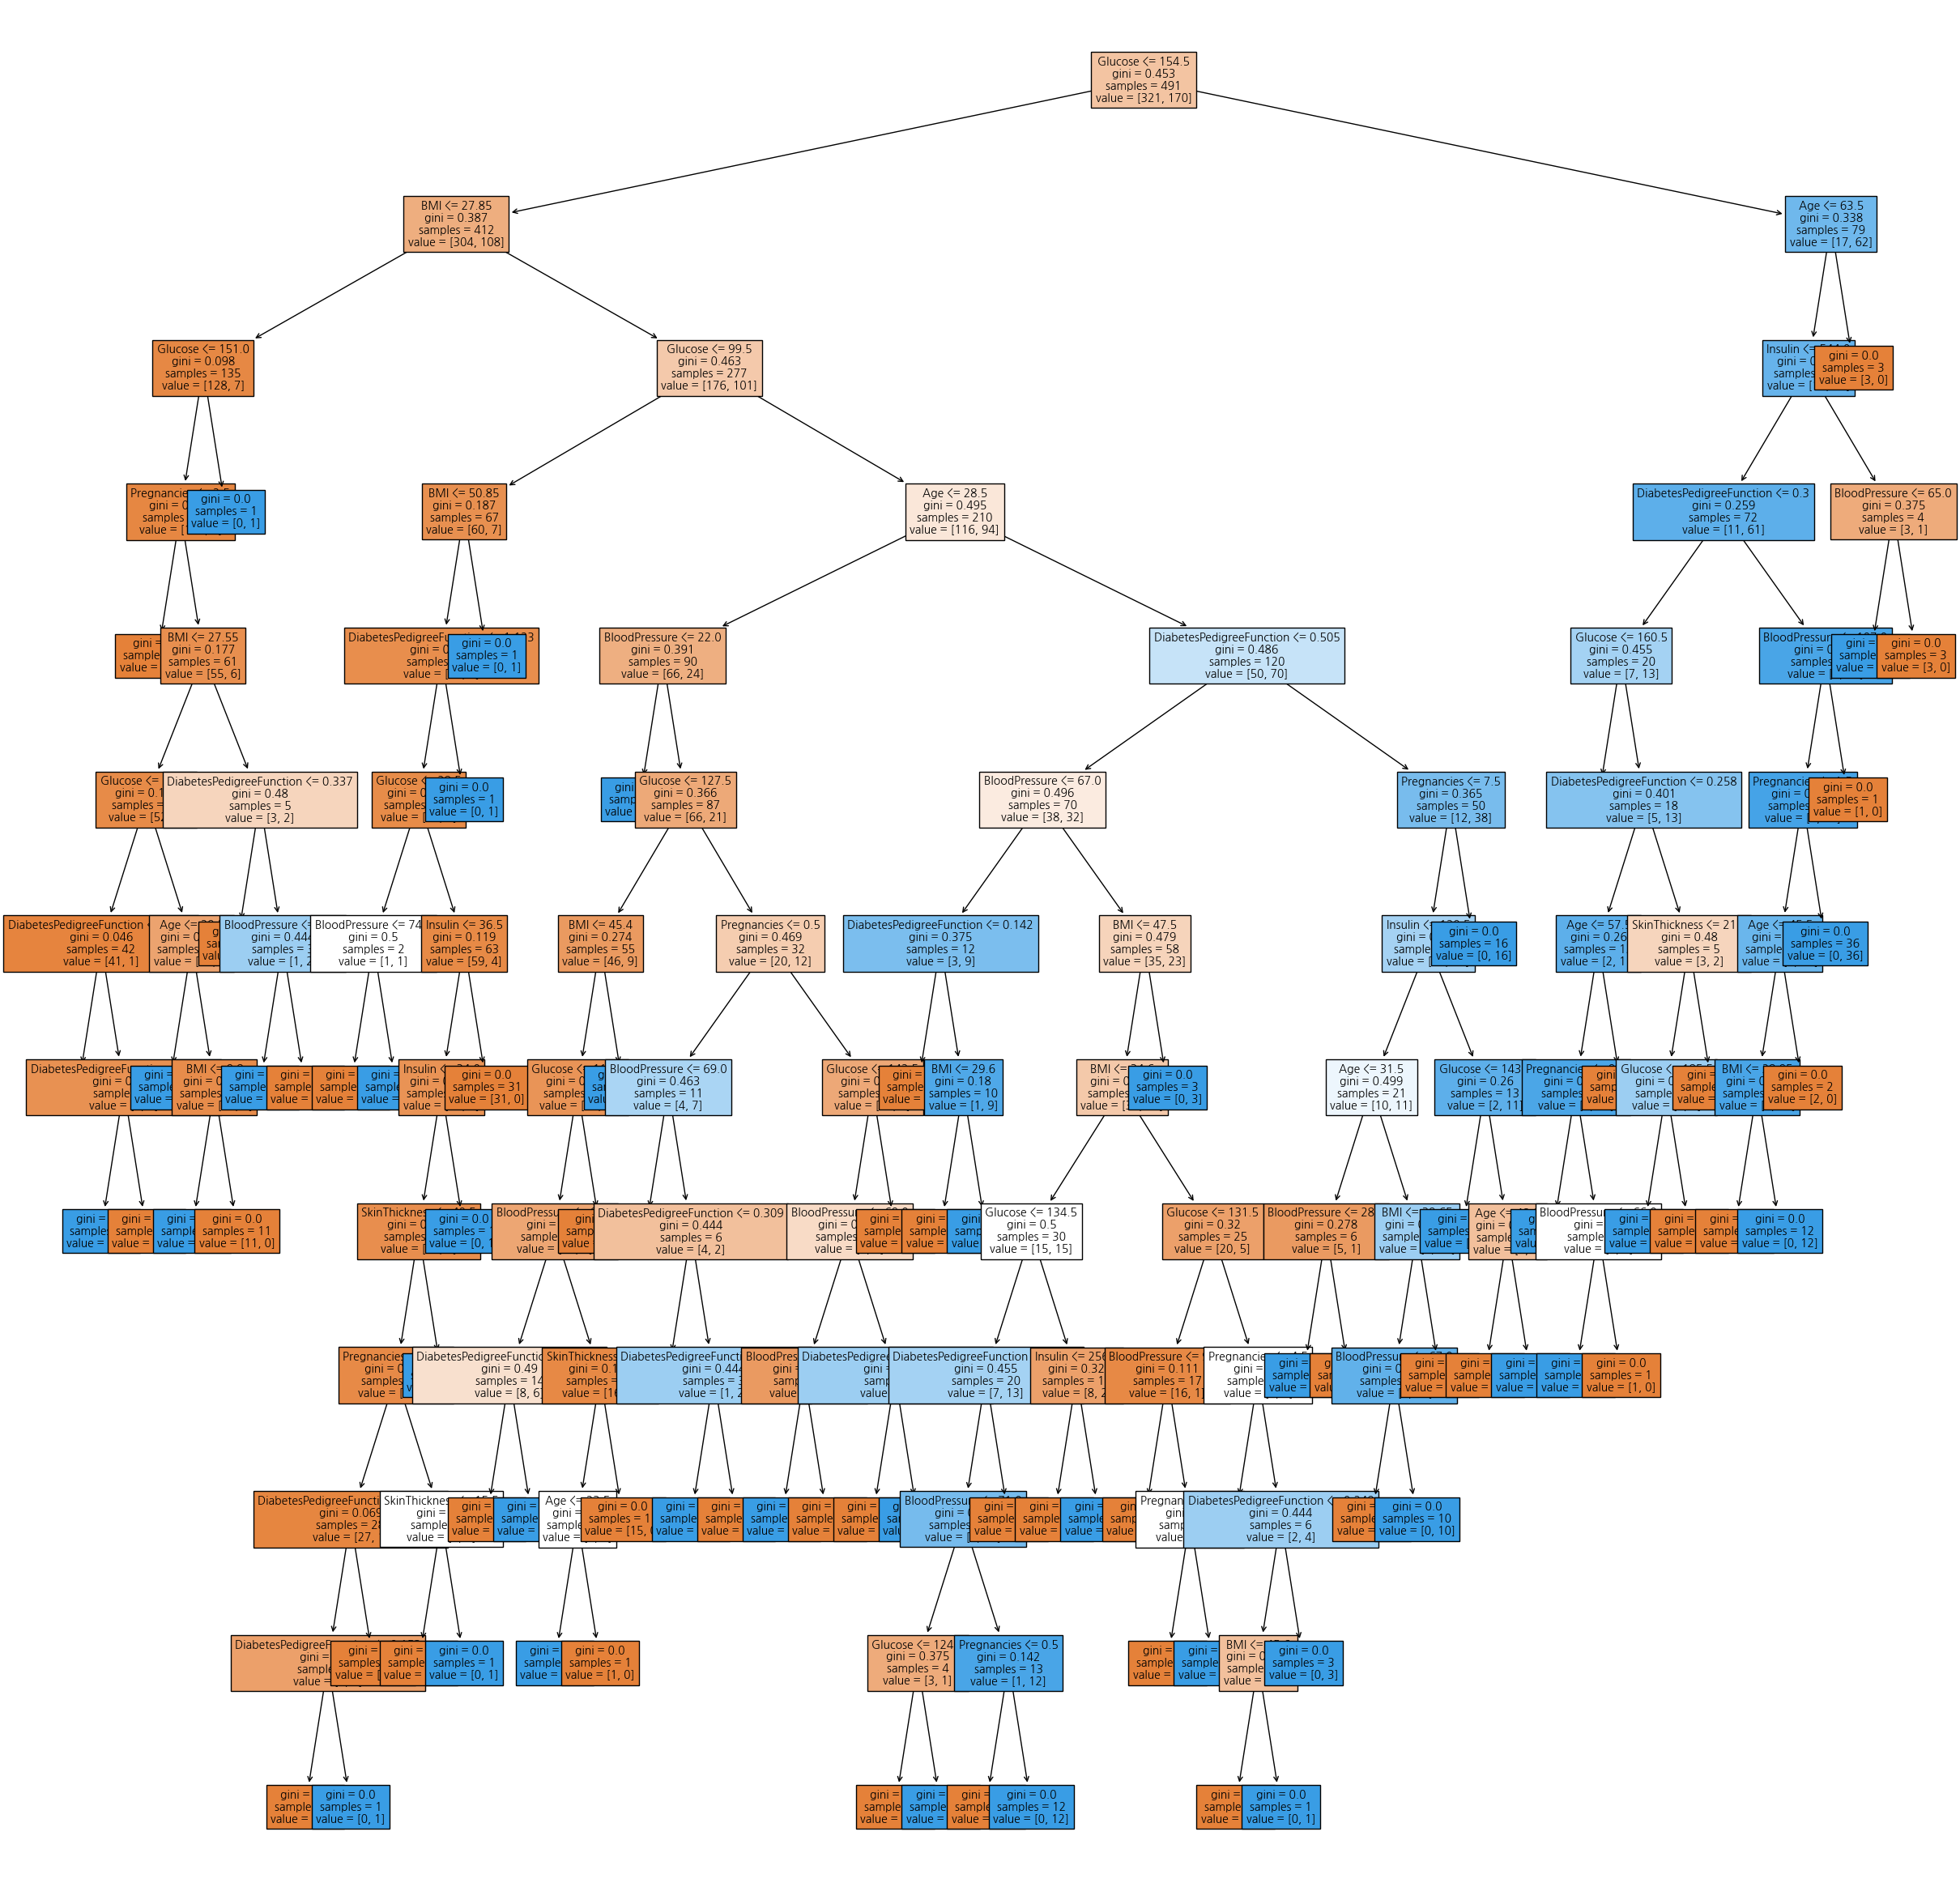

In [117]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
p_t = plot_tree(model,feature_names=features ,filled=True, fontsize=10)
plt.show()

지니 계수가 0이되면 트리 생성을 제한하는데, 파라미터 튜닝을 진행하지 않은 상황에서는 16개의 Leaf node가 존재함  
그래프가 크므로 상위 4개 노드만 그려보면,  

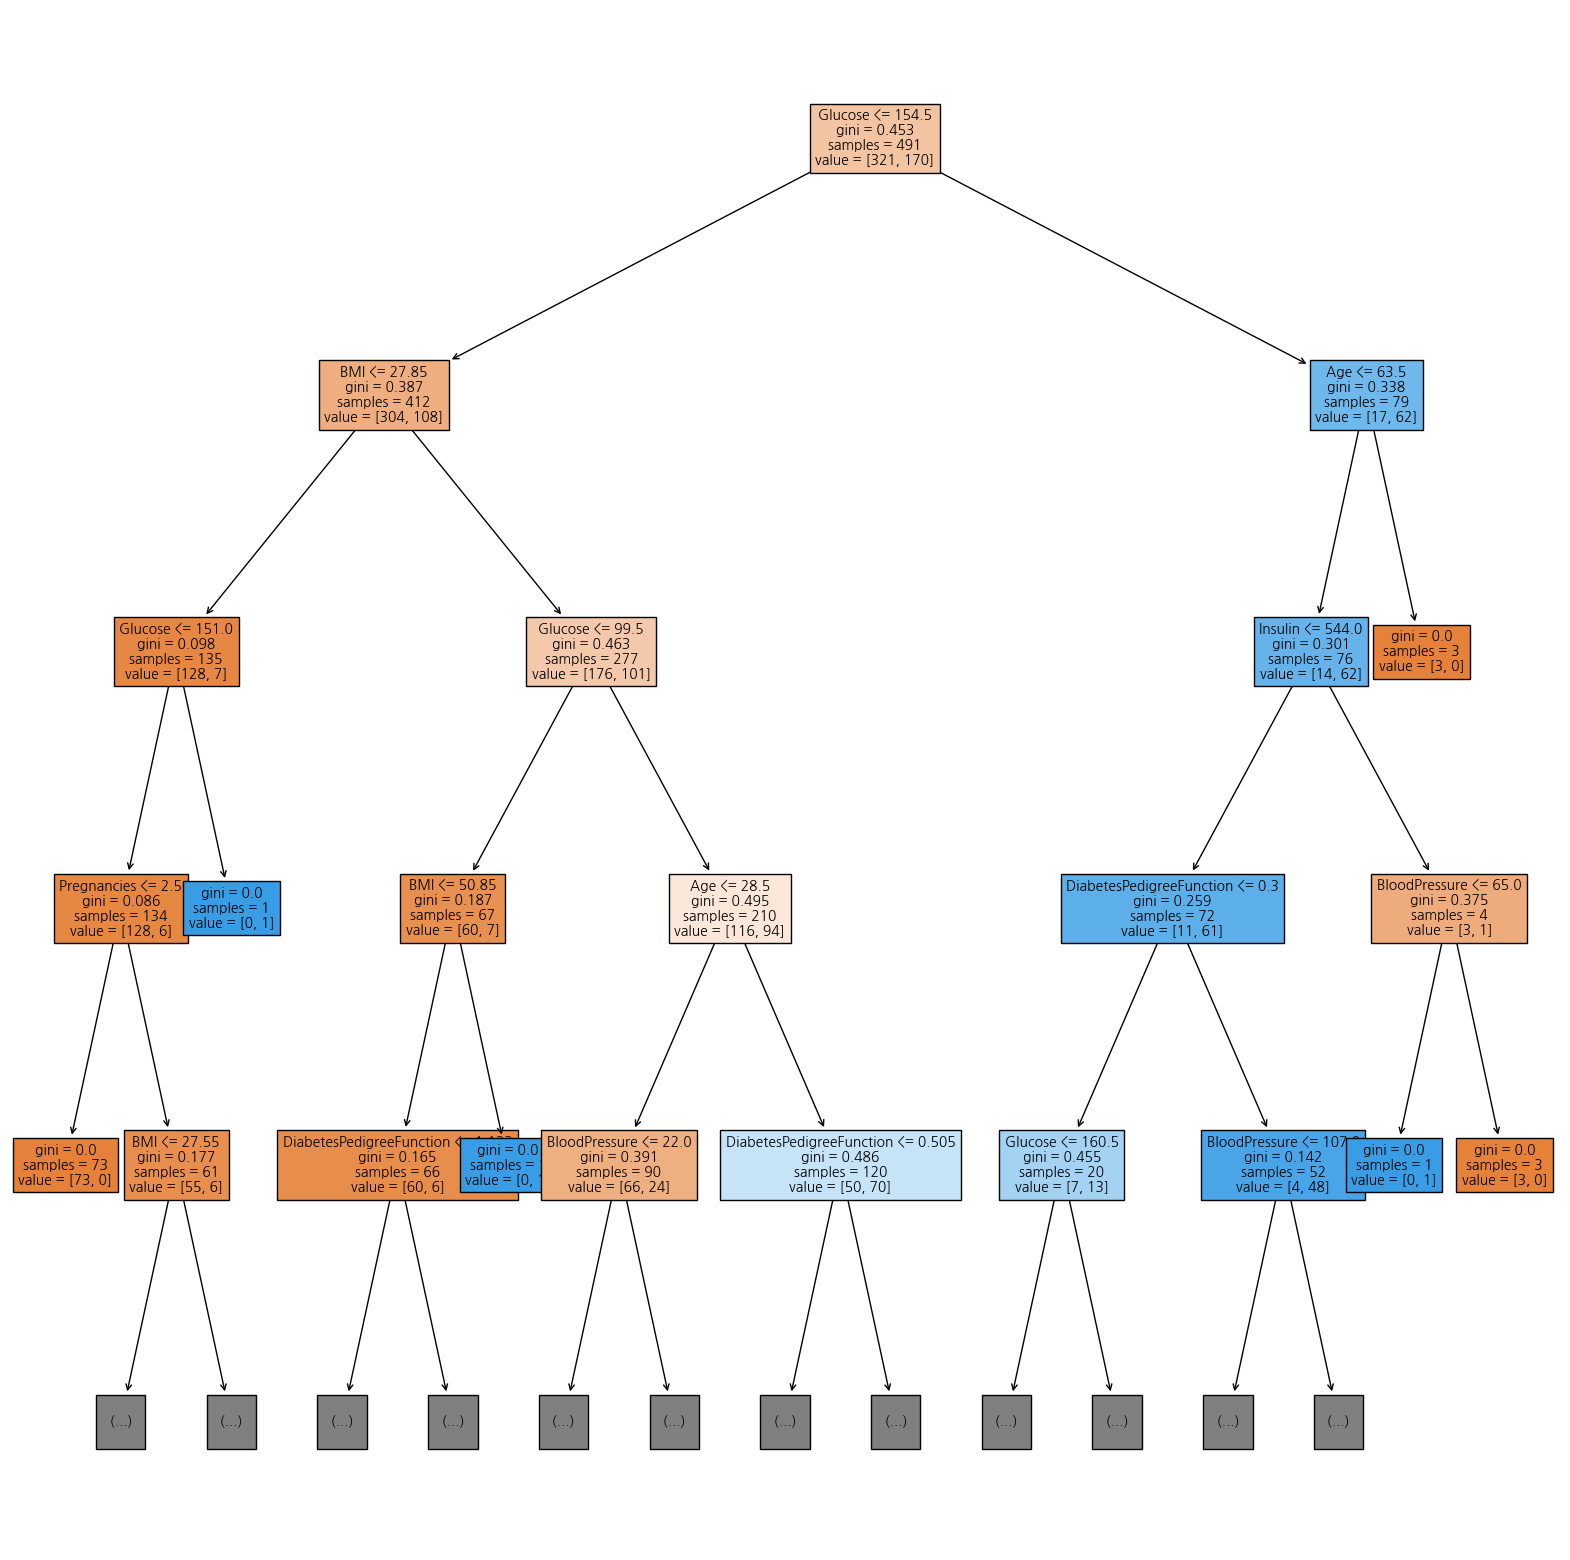

In [118]:
# 상위 4개 노드만 출력 해봅니다
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
p_t = plot_tree(model, max_depth = 4,feature_names=features ,filled=True, fontsize=10)
plt.show()

결정 트리의 최상위에 `Glucose`가 온 것을 확인 할 수 있음  
결정 트리의 최상단에는 가장 중요한 feature가 옴

##### 특성(feature)의 중요도 추출하기

In [119]:
model.feature_importances_

array([0.05537263, 0.30582013, 0.12928239, 0.02085216, 0.0433889 ,
       0.17179015, 0.15644365, 0.11704999])

In [120]:
# 특성의 중요도의 합을 구해 1이 나오는지 확인 해봅니다.
model.feature_importances_.sum()

1.0

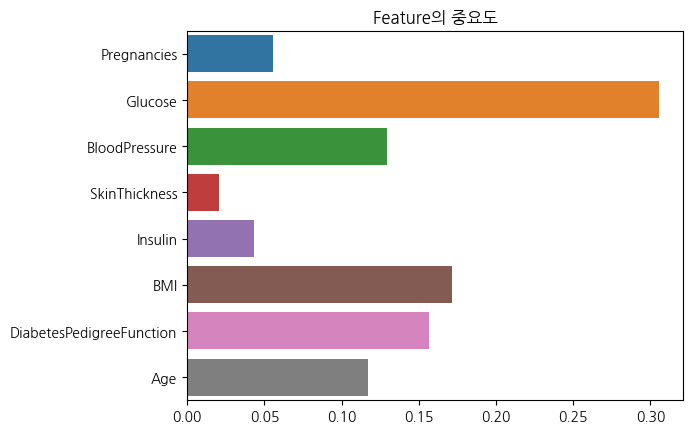

In [121]:
# 특성의 중요도를 시각화 해봅니다
_ = sns.barplot(x=model.feature_importances_,
                y=features).set_title("Feature의 중요도")

#### 성능 평가
성능 평가 방식은 다양하나 정확도만을 이용해 성능을 평가함

In [122]:
# 사이킷런에 구현된 기능을 이용하지 말고 직접 정확도를 구해보세요!
(y_test == y_predict).mean() * 100

69.10569105691057

위와 같은 방식으로 정확도를 구할 수 있지만, `sklearn`의 내장 함수를 사용

In [123]:
# 사이킷런의 내장 함수로 정확도를 구해봅니다!
accuracy_score(y_test, y_predict)

0.6910569105691057

In [124]:
# 모델에서 score를 호출해 정확도를 구해봅니다!
model.score(X_test,y_test)

0.6910569105691057

### 결정 트리 모델의 하이퍼파라미터 조절
모델을 생성 할 때, 기본적으로 주어지는 피처의 개수나 최대 높이를 제한해 모델을 생성하고 성능을 평가해봄

In [125]:
# 결정 트리 모델의 최대 높이를 4로 제한하고, 고려하는 특성의 비율도 0.8로 조절해서 모델을 생성
# 학습과 예측까지 진행 해보세요!
# 예측값을 y_pre_max4라는 변수에 지정하면 이후 실습에서 코드를 수정하지 않아도 됩니다


model = DecisionTreeClassifier(random_state=42,max_depth=4,max_features = 0.8)
y_pre_max4 = model.fit(X_train, y_train).predict(X_test)

In [126]:
accuracy_score(y_test, y_pre_max4)

0.7723577235772358

3점 정도의 성능 향상이 있음  
모든 특성을 사용한다고 좋은 성능이 나오는 것은 아님

### Feature Engineering
Garbage In - Garbage Out, 잘 전처리된 데이터를 사용하면 좋은 성능이 나온다는 의미  
실제로 모델을 생성하기 이전에 EDA를 통해, 데이터를 분석하고 전처리하는 과정이 중요함

#### 수치형 변수를 범주형 변수로 만들기
먼저, 임신 횟수를 히스토그램으로 나타내 봅니다

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

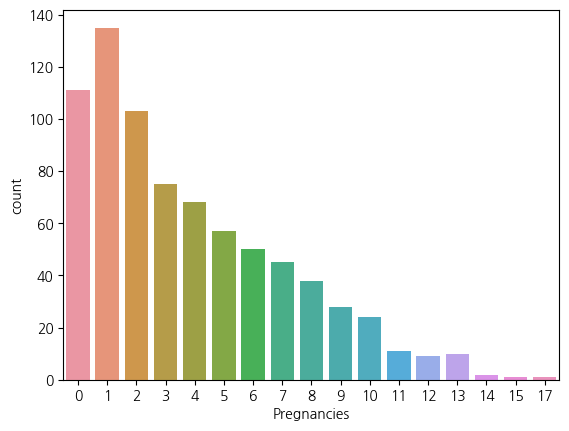

In [127]:
sns.countplot(data=df_pima,x='Pregnancies')

임신 횟수를 당뇨병 여부를 기준으로 나타내 봅니다

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

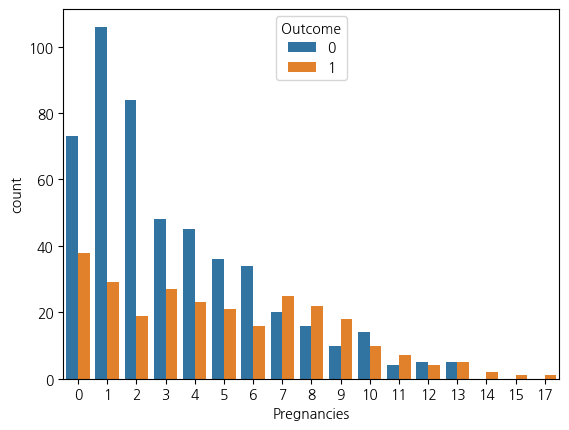

In [128]:
sns.countplot(data=df_pima,x='Pregnancies',hue='Outcome')

Pima 인디언 데이터 셋에서 `Pregnancies`의 경우 3회 미만인 경우가 대부분임  
0 ~ 17까지 수치형 범주지만, 범주형 변주로 바꾸는 피쳐 엔지니어링을 진행함 -> 임신 횟수 6회를 기준으로 범주형으로 전환

In [129]:
df_pima["Pregnancies_high"] = np.where(df_pima["Pregnancies"] > 6,True , False)  # 해당 부분의 로직을 작성하면 됩니다
df_pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


In [138]:
features = df_pima.columns.tolist()

In [139]:
# 피쳐 엔지니어링을 통해 아래 값과 동일하게 feature_name 변수에 리스트 형식으로 저장합니다
features.remove('Pregnancies')
features.remove("Outcome")

In [140]:
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [141]:
# DT를 이용해 학습과 예측을 진행해보세요!
# 해당 예측값을 y_pre_max4_Pre_high에 저장하면 이후 실습에서 코드를 수정하지 않아도 됩니다


# feature가 바뀌었으니 train / test 를 다시 나누기 
split_count=int(df_pima.shape[0]*0.8)

print(split_count)

train = df_pima[:split_count]
test= df_pima[split_count:]
print(train.shape, test.shape)

X_train=train[features]
y_train=train[label]
X_test=test[features]
y_test=test[label]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model = DecisionTreeClassifier(random_state=42,max_depth=4,max_features = 0.8)
y_pre_max4_Pre_high = model.fit(X_train, y_train).predict(X_test)

614
(614, 10) (154, 10)
(614, 8) (614,) (154, 8) (154,)


In [142]:
accuracy_score(y_test, y_pre_max4_Pre_high)

0.7727272727272727

같은 모델에서, 하나의 특성만 수치형에서 범주형으로 변경했는데 3점 정도의 성능 향상이 있었음

#### 결측치 처리하기
먼저, `Insulin`의 값을 히스토그램으로 시각화 해봅니다

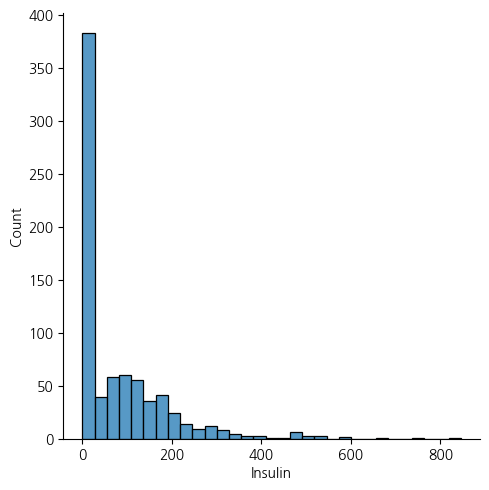

In [144]:
sns.displot(df_pima['Insulin'])

`Insulin` 항목의 경우 0으로 기입된 결측치가 많이 존재함

In [ ]:
# Outcome을 기준으로, Insulin의 값을 구분해 KDE와 함께 시각화 해봅니다
plt.figure(figsize=(5,3))
sns.displot(df_pima, x= 'Insulin' ,hue='Outcome', kde=True)

`seaborn hist`에서 `kde(밀도 추정)`을하면 해당 레이블의 밀도를 확인 가능함

`Insulin` 항목에서 약 48%의 결측치가 존재함  
결측치를 해결하는 방법은 여러가지가 존재하지만, 중앙값으로 대체하는 방식과 평균값으로 보완 두 가지 방식으로 진행

In [145]:
# groupby를 통해 인슐린의 통계값을 구해보세요!
df_pima.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


##### 중앙값 사용
중앙값을 이용해 결측치를 채워 봅니다

In [146]:
df_pima["Insulin_filled"] = df_pima["Insulin"].replace(0,np.nan)

In [147]:
Insulin_median = df_pima.groupby("Outcome")["Insulin_filled"].median()
Insulin_median

Outcome
0    102.5
1    169.5
Name: Insulin_filled, dtype: float64

In [148]:
df_pima.loc[(~df_pima["Outcome"])&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_median[0]
df_pima.loc[(df_pima["Outcome"])&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_median[1]

In [149]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,169.5
1,1,85,66,29,0,26.6,0.351,31,0,False,102.5
2,8,183,64,0,0,23.3,0.672,32,1,True,169.5
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.0
764,2,122,70,27,0,36.8,0.340,27,0,False,102.5
765,5,121,72,23,112,26.2,0.245,30,0,False,112.0
766,1,126,60,0,0,30.1,0.349,47,1,False,169.5


In [157]:
features = df_pima.columns.tolist()
features.remove("Insulin") # 기존 인슐린 값
features.remove("Pregnancies")
features.remove("Outcome")

In [158]:
features 

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

In [159]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_50_per로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다

split_count = int(df_pima.shape[0]*0.8)
print(split_count)


train = df_pima[:split_count]
test = df_pima[split_count:]
print(train.shape, test.shape)

X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


model = DecisionTreeClassifier(random_state=42,max_depth=4,max_features = 0.8)
y_pre_max4_50_per = model.fit(X_train, y_train).predict(X_test)

614
(614, 11) (154, 11)
(614, 8) (614,) (154, 8) (154,)


In [161]:
accuracy_score(y_test, y_pre_max4_50_per)

0.8961038961038961

중앙값으로 `Insulin`의 결측치를 대체한 경우 약 11점 정도의 성능 향상이 있음

##### 평균값 사용
평균값을 이용해 결측치를 채워 봅니다

In [162]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_mean로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다
df_pima["Insulin_filled"] = df_pima["Insulin"]
df_pima["Insulin_filled"] = df_pima["Insulin"].replace(0,np.nan)
Insulin_mean = df_pima.groupby("Outcome")["Insulin"].mean()
Insulin_mean

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

In [163]:
df_pima.loc[(~df_pima["Outcome"])&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_mean[0]
df_pima.loc[(df_pima["Outcome"])&df_pima["Insulin_filled"].isnull(), "Insulin_filled"] = Insulin_mean[1]

In [164]:
train = df_pima[:split_count]
test = df_pima[split_count:]
print(train.shape, test.shape)

features = df_pima.columns.tolist()
features.remove("Outcome")
features.remove("Pregnancies")
features.remove("Insulin")


X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model.fit(X_train, y_train)
y_pre_max4_mean = model.predict(X_test)
y_pre_max4_mean

(614, 11) (154, 11)
(614, 8) (614,) (154, 8) (154,)


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [165]:
accuracy_score(y_test, y_pre_max4_mean)

0.8506493506493507

`Insulin`의 결측치를 처리하기 이전보다는 약 8점 정도의 성능 향상이 있지만, 중앙값으로 대체한 경우보다는 성능이 3점 정도 낮음

#### 이상치(Outlier)
결측치 처리를 2가지 방식으로 했지만, 이상치를 분석하는 과정은 **평균**으로 처리한 경우를 다룸

C:\Users\sanga\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


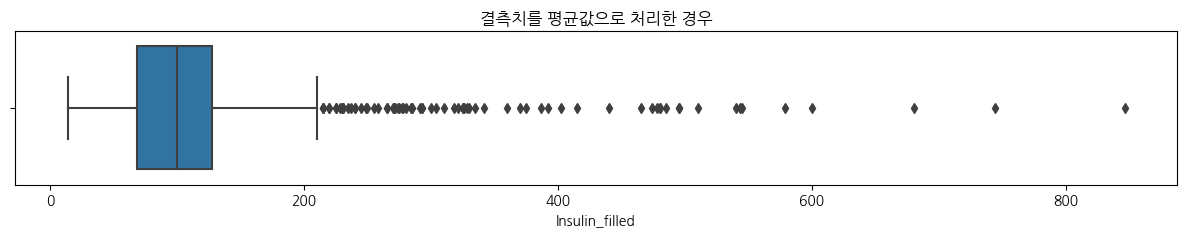

In [167]:
# 인슐린의 결측치를 평균값으로 처리한 경우의 이상치를 시각화 해봅니다
plt.figure(figsize=(15, 2))
sns.boxplot(df_pima["Insulin_filled"])
plt.title("결측치를 평균값으로 처리한 경우");

In [168]:
# 통계값을 구해봅니다
df_pima["Insulin_filled"].describe()

count    768.000000
mean     118.967780
std       93.557899
min       14.000000
25%       68.792000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_filled, dtype: float64

<AxesSubplot:ylabel='Density'>

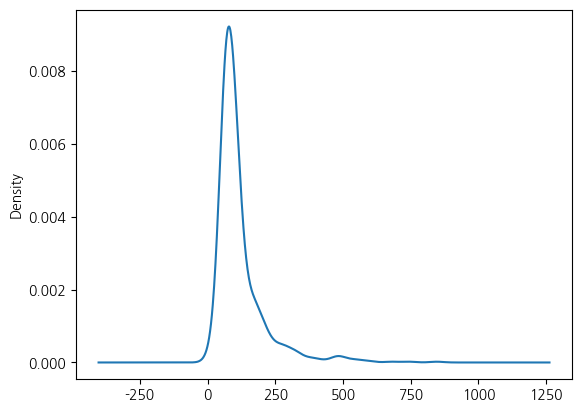

In [169]:
# KDE로 이상치 처리 이전의 값을 시각화 해봅니다
df_pima["Insulin_filled"].plot(kind="kde")

결측치 문제를 해결했지만 이상치의 문제가 있음  
75%가 넘어가는 부분을 평균으로 대체해줌

In [170]:
desc = df_pima["Insulin_filled"].describe()
desc

count    768.000000
mean     118.967780
std       93.557899
min       14.000000
25%       68.792000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_filled, dtype: float64

In [171]:
df_pima[df_pima["Insulin_filled"] > desc["75%"]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_filled
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
8,2,197,70,45,543,30.5,0.158,53,1,False,543.0
13,1,189,60,23,846,30.1,0.398,59,1,False,846.0
14,5,166,72,19,175,25.8,0.587,51,1,False,175.0
16,0,118,84,47,230,45.8,0.551,31,1,False,230.0
...,...,...,...,...,...,...,...,...,...,...,...
740,11,120,80,37,150,42.3,0.785,48,1,True,150.0
744,13,153,88,37,140,40.6,1.174,39,0,True,140.0
748,3,187,70,22,200,36.4,0.408,36,1,False,200.0
753,0,181,88,44,510,43.3,0.222,26,1,False,510.0


In [173]:
df_pima.loc[(~df_pima["Outcome"])&(df_pima["Insulin_filled"] > desc["75%"]), "Insulin_filled"] = Insulin_mean[0]
df_pima.loc[(df_pima["Outcome"]==1)&(df_pima["Insulin_filled"] > desc["75%"]), "Insulin_filled"] = Insulin_mean[1]

C:\Users\sanga\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '이상치 처리 후')

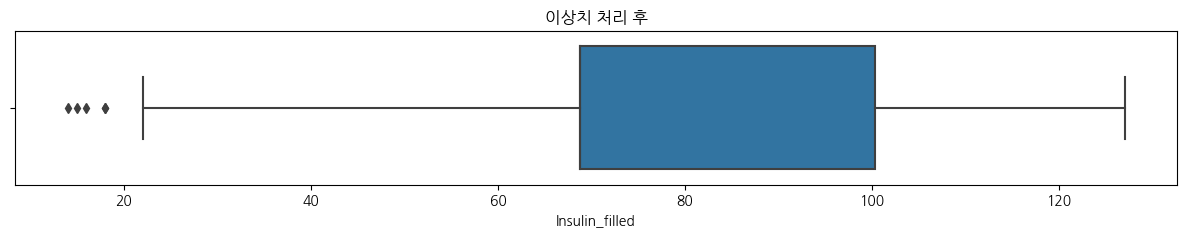

In [174]:
# 이상치 처리 후 값을 시각화 해봅니다
plt.figure(figsize=(15, 2))
sns.boxplot(df_pima["Insulin_filled"])
plt.title("이상치 처리 후")

<AxesSubplot:ylabel='Density'>

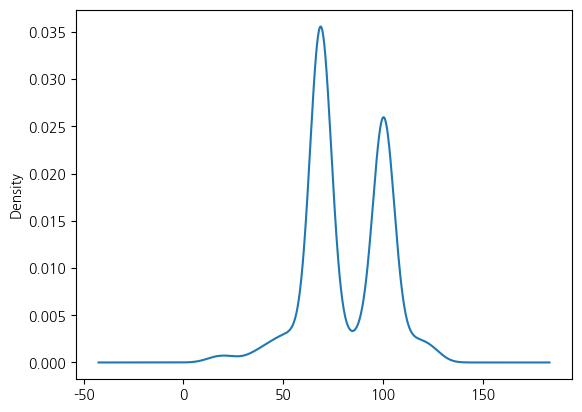

In [175]:
# 이상치 처리 후 값을 시각화 해봅니다
df_pima["Insulin_filled"].plot(kind="kde")

In [176]:
# 이상치를 처리한 이후에 DT 알고리즘으로 학습과 예측을 해봅니다
# 예상값을 y_pre_max4_mean_out 변수에 저장하면 이후 실습에서 코드를 수정 할 필요가 없습니다


train = df_pima[:split_count]
test = df_pima[split_count:]
print(train.shape, test.shape)

features = df_pima.columns.tolist()
features.remove("Outcome")
features.remove("Pregnancies")
features.remove("Insulin")


X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model.fit(X_train, y_train)
y_pre_max4_mean_out = model.predict(X_test)
y_pre_max4_mean_out

accuracy_score(y_test, y_pre_max4_mean_out)

(614, 11) (154, 11)
(614, 8) (614,) (154, 8) (154,)


0.922077922077922

In [50]:
accuracy_score(y_test, y_pre_max4_mean_out)

0.8441558441558441

이상치를 처리한 후에 성능이 조금 떨어졌음  
통계를 기반으로하는 이상치 처리는 위험할 수도 있음  
효과적인 이상치 탐색을 위해서는 해당 데이터 변수들의 의미와 도메인을 이해하고 원인을 파악하고 처리해야 됨

### Overfitting과 Underfitting
해당 개념도 다뤄보고 싶은데, 사용한 데이터 셋의 크기가 작은 편이라 마땅한 방식을 생각하지 못해 개념만 소개하고 넘어가는걸로..  

##### Overfitting (과적합)
Train 데이터에 과하게 영향을 받아, 훈련 평가 성능은 좋으나 테스트 평가 성능이 낮은 경우

##### Underfitting (과소적합)
Train 데이터의 양이 적어 학습을 제대로하지 못한 경우  

![img](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

[이미지 출처: scikit learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)